In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def linear_theory(x_exp, y_exp):
    """
    :param x_exp: list -- experimental data for x-axis
    :param y_exp: list -- experimental data for y-axis
    :return: x_th, y_th -- lists with linear approximation of experimental data
    """
    k = np.polyfit(x_exp, y_exp, 1)
    m, M = min(x_exp), max(x_exp)
    x_th = np.arange(m - 0.05 * (M - m), M + 0.05 * (M - m), 0.0001 * (M - m))
    y_th = []
    for _ in range(0, len(x_th)):
        y_th.append(k[0] * x_th[_] + k[1])
    return x_th, y_th


def plot1(x_exp, y_exp, x_name, y_name, legend, x_err_formula_index=0, y_err_formula_index=0):
    """
    Function for drawing plot with one curve of points (x_exp, y_exp) with linear approximation and error-bars
    :param x_exp: list -- experimental data for x-axis
    :param y_exp: list -- experimental data for y-axis
    :param x_name: string -- name for x-axis
    :param y_name: string -- name for x-axis
    :param legend: string -- legend for plot
    :param x_err_formula_index: int -- index that represents number of standard formulas
                                       for calculating errors (see x_err_formula)
    :param y_err_formula_index: int -- index that represents number of standard formulas
                                       for calculating errors (see н_err_formula)
    :return: plot
    """
    x_th, y_th = linear_theory(x_exp, y_exp)
    xerr, yerr = error_function(x_exp, y_exp, x_err_formula_index, y_err_formula_index)
    plt.figure(figsize=(10, 5))
    plt.plot(x_th, y_th, label=legend)
    plt.errorbar(x_exp, y_exp, xerr=xerr, yerr=yerr, fmt=".k", label="Экспериментальные точки")

    plt.xlabel(x_name, fontsize=14)
    plt.ylabel(y_name, fontsize=14)
    plt.grid(True)
    plt.legend(loc='best', fontsize=12)
    plt.show()
    return error_of_exp(x_exp, y_exp)


def plot_3_on_1(x_exp1, y_exp1, x_name1, y_name1, legend1, x_err_formula_index1, y_err_formula_index1,
                x_exp2, y_exp2, x_name2, y_name2, legend2, x_err_formula_index2, y_err_formula_index2,
                x_exp3, y_exp3, x_name3, y_name3, legend3, x_err_formula_index3, y_err_formula_index3, title):
    """
    Function for drawing plot with three subplots each containing one curve of points (x_exp, y_exp)
    with linear approximation and error-bars
    :param x_exp1: list -- experimental data for x-axis on subplot №1
    :param y_exp1: list -- experimental data for y-axis on subplot №1
    :param x_name1: string -- name for x-axis on subplot №1
    :param y_name1: string -- name for y-axis on subplot №1
    :param legend1: string -- legend for subplot №1
    :param x_err_formula_index1: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index1: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp2: list -- experimental data for x-axis on subplot №2
    :param y_exp2: list -- experimental data for y-axis on subplot №2
    :param x_name2: string -- name for x-axis on subplot №2
    :param y_name2: string -- name for y-axis on subplot №2
    :param legend2: string -- legend for subplot №2
    :param x_err_formula_index2: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index2: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp3: list -- experimental data for x-axis on subplot №3
    :param y_exp3: list -- experimental data for y-axis on subplot №3
    :param x_name3: string -- name for x-axis on subplot №3
    :param y_name3: string -- name for y-axis on subplot №3
    :param legend3: string -- legend for subplot №3
    :param x_err_formula_index3: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index3: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param title: string -- title for hole plot
    :return: plot
    """
    x_th1, y_th1 = linear_theory(x_exp1, y_exp1)
    xerr1, yerr1 = error_function(x_exp1, y_exp1, x_err_formula_index1, y_err_formula_index1)

    x_th2, y_th2 = linear_theory(x_exp2, y_exp2)
    xerr2, yerr2 = error_function(x_exp2, y_exp2, x_err_formula_index2, y_err_formula_index2)

    x_th3, y_th3 = linear_theory(x_exp3, y_exp3)
    xerr3, yerr3 = error_function(x_exp3, y_exp3, x_err_formula_index3, y_err_formula_index3)

    fig, axs = plt.subplots(3, sharex=True, sharey=True)
    fig.suptitle(title)
    ax0 = axs[0]
    ax0.plot(x_th1, y_th1, label=legend1)
    ax0.errorbar(x_exp1, y_exp1, xerr1, yerr1, fmt=".k", label="Экспериментальные точки")
    ax0.set_xlabel(x_name1, fontsize=14)
    ax0.set_ylabel(y_name1, fontsize=14)
    ax0.grid(True)
    ax0.legend(loc='best', fontsize=12)

    ax1 = axs[1]
    ax1.plot(x_th2, y_th2, label=legend2)
    ax1.errorbar(x_exp2, y_exp2, xerr2, yerr2, fmt=".k", label="Экспериментальные точки")
    ax1.set_xlabel(x_name2, fontsize=14)
    ax1.set_ylabel(y_name2, fontsize=14)
    ax1.grid(True)
    ax1.legend(loc='best', fontsize=12)

    ax2 = axs[2]
    ax2.plot(x_th3, y_th3, label=legend3)
    ax2.errorbar(x_exp3, y_exp3, xerr3, yerr3, fmt=".k", label="Экспериментальные точки")
    ax2.set_xlabel(x_name3, fontsize=14)
    ax2.set_ylabel(y_name3, fontsize=14)
    ax2.grid(True)
    ax2.legend(loc='best', fontsize=12)
    plt.show()


def plot_3_in_1(x_exp1, y_exp1, legend1, x_err_formula_index1, y_err_formula_index1,
                x_exp2, y_exp2, legend2, x_err_formula_index2, y_err_formula_index2,
                x_exp3, y_exp3, legend3, x_err_formula_index3, y_err_formula_index3, x_name, y_name):
    """
    Function for drawing plot with three curves of points (x_exp, y_exp)
    with linear approximation and error-bars
    :param x_exp1: list -- experimental data for x-axis
    :param y_exp1: list -- experimental data for y-axis
    :param legend1: string -- legend for curve №1
    :param x_err_formula_index1: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index1: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp2: list -- experimental data for x-axis
    :param y_exp2: list -- experimental data for y-axis
    :param legend2: string -- legend for curve №2
    :param x_err_formula_index2: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index2: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp3: list -- experimental data for x-axis
    :param y_exp3: list -- experimental data for y-axis
    :param legend3: string -- legend for curve №3
    :param x_err_formula_index3: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index3: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_name:  string -- name for x-axis on plot
    :param y_name:  string -- name for y-axis on plot
    :return: plot
    """
    x_th1, y_th1 = linear_theory(x_exp1, y_exp1)
    xerr1, yerr1 = error_function(x_exp1, y_exp1, x_err_formula_index1, y_err_formula_index1)

    x_th2, y_th2 = linear_theory(x_exp2, y_exp2)
    xerr2, yerr2 = error_function(x_exp2, y_exp2, x_err_formula_index2, y_err_formula_index2)

    x_th3, y_th3 = linear_theory(x_exp3, y_exp3)
    xerr3, yerr3 = error_function(x_exp3, y_exp3, x_err_formula_index3, y_err_formula_index3)

    plt.figure(figsize=(10, 5))
    plt.plot(x_th1, y_th1, label=legend1)
    plt.errorbar(x_exp1, y_exp1, xerr1, yerr1, fmt=".k")

    plt.plot(x_th2, y_th2, label=legend2)
    plt.errorbar(x_exp2, y_exp2, xerr2, yerr2, fmt=".k")

    plt.plot(x_th3, y_th3, label=legend3)
    plt.errorbar(x_exp3, y_exp3, xerr3, yerr3, fmt=".k")

    plt.xlabel(x_name, fontsize=17)
    plt.ylabel(y_name, fontsize=17)
    plt.grid(True)
    plt.legend(loc='best', fontsize=15)
    plt.show()


def plot_4_in_1(x_exp1, y_exp1, legend1, x_err_formula_index1, y_err_formula_index1,
                x_exp2, y_exp2, legend2, x_err_formula_index2, y_err_formula_index2,
                x_exp3, y_exp3, legend3, x_err_formula_index3, y_err_formula_index3,
                x_exp4, y_exp4, legend4, x_err_formula_index4, y_err_formula_index4, x_name, y_name):
    """
    Function for drawing plot with fore curves of points (x_exp, y_exp)
    with linear approximation and error-bars
    :param x_exp1: list -- experimental data for x-axis
    :param y_exp1: list -- experimental data for y-axis
    :param legend1: string -- legend for curve №1
    :param x_err_formula_index1: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index1: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp2: list -- experimental data for x-axis
    :param y_exp2: list -- experimental data for y-axis
    :param legend2: string -- legend for curve №2
    :param x_err_formula_index2: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index2: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp3: list -- experimental data for x-axis
    :param y_exp3: list -- experimental data for y-axis
    :param legend3: string -- legend for curve №3
    :param x_err_formula_index3: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index3: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_exp4: list -- experimental data for x-axis
    :param y_exp4: list -- experimental data for y-axis
    :param legend4: string -- legend for curve №4
    :param x_err_formula_index4: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index4: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :param x_name: string -- name for x-axis on plot
    :param y_name: string -- name for y-axis on plot
    :return: plot
    """
    x_th1, y_th1 = linear_theory(x_exp1, y_exp1)
    xerr1, yerr1 = error_function(x_exp1, y_exp1, x_err_formula_index1, y_err_formula_index1)

    x_th2, y_th2 = linear_theory(x_exp2, y_exp2)
    xerr2, yerr2 = error_function(x_exp2, y_exp2, x_err_formula_index2, y_err_formula_index2)

    x_th3, y_th3 = linear_theory(x_exp3, y_exp3)
    xerr3, yerr3 = error_function(x_exp3, y_exp3, x_err_formula_index3, y_err_formula_index3)

    x_th4, y_th4 = linear_theory(x_exp4, y_exp4)
    xerr4, yerr4 = error_function(x_exp4, y_exp4, x_err_formula_index4, y_err_formula_index4)

    plt.figure(figsize=(10, 5))
    plt.plot(x_th1, y_th1, label=legend1)
    plt.errorbar(x_exp1, y_exp1, xerr1, yerr1, fmt=".k")

    plt.plot(x_th2, y_th2, label=legend2)
    plt.errorbar(x_exp2, y_exp2, xerr2, yerr2, fmt=".k")

    plt.plot(x_th3, y_th3, label=legend3)
    plt.errorbar(x_exp3, y_exp3, xerr3, yerr3, fmt=".k")

    plt.plot(x_th4, y_th4, label=legend4)
    plt.errorbar(x_exp4, y_exp4, xerr4, yerr4, fmt=".k")

    plt.xlabel(x_name, fontsize=17)
    plt.ylabel(y_name, fontsize=17)
    plt.grid(True)
    plt.legend(loc='best', fontsize=15)
    plt.show()


def x_err_formula(x_err_formula_index, x, y):
    """
    Function for calculating error for x-coordinate
    :param x_err_formula_index: int -- index that represents particular function error_x (x, y, ather parametrs)
                                       realized in x_err_formula function
    :param x: float -- x-coordinate from experimental data for calculating errors
    :param y: float -- y-coordinate from experimental data for calculating errors
    :return: float -- error of x-coordinate
    """
    if x_err_formula_index == 0:
        varepsilon = 0
        return abs(x) * varepsilon


def y_err_formula(y_err_formula_index, x, y):
    """
    Function for calculating error for y-coordinate
    :param y_err_formula_index: int -- index that represents particular function error_y (x, y, ather parametrs)
                                       realized in y_err_formula function
    :param x: float -- x-coordinate from experimental data for calculating errors
    :param y: float -- y-coordinate from experimental data for calculating errors
    :return: float -- error of y-coordinate
    """
    if y_err_formula_index == 0:
        varepsilon = 0
        return abs(y) * varepsilon


def error_function(x_exp, y_exp, x_err_formula_index, y_err_formula_index):
    """
    General function for calculating errors tha use particular formulas from x_err_formula and y_err_formula
    :param x_exp: list -- experimental data (x-coordinate)
    :param y_exp: list -- experimental data (y-coordinate)
    :param x_err_formula_index: int -- index that represents number of standard formulas
                                        for calculating errors (see x_err_formula)
    :param y_err_formula_index: int -- index that represents number of standard formulas
                                        for calculating errors (see y_err_formula)
    :return: x_err, y_err -- lists with errors for x- and y-coordinates
    """
    x_err = []
    y_err = []
    for _ in range(0, len(x_exp)):
        x_err.append(0)
        if(y_err_formula_index!=0):
            y_err.append(abs(y_err_formula_index*y_exp[_]/(np.cos(y_exp[_])**2)))
        else :y_err.append(0)
    return x_err, y_err


def error_of_exp(x_exp, y_exp, flag=0):
    """
    Calculating errors of linear coefficients in experiment
    :param x_exp: list -- experimental data (x-coordinate)
    :param y_exp: list -- experimental data (y-coordinate)
    :param flag: int -- if flag == 0 function will print errors of linear coefficients in experiment
    :return: er_k, er_b -- float -- errors of linear coefficients in experiment
    """
    coefficient = np.polyfit(x_exp, y_exp, 1)
    k, b = coefficient[0], coefficient[1]
    av_x = 0
    for _ in range(len(x_exp)):
        av_x += x_exp[_]
    av_x = av_x / len(x_exp)

    av_y = 0
    for _ in range(len(y_exp)):
        av_y += y_exp[_]
    av_y = av_y / len(y_exp)

    D_x = 0
    for _ in range(len(x_exp)):
        D_x += (x_exp[_] - av_x)**2
    D_x = D_x / len(x_exp)

    D_y = 0
    for _ in range(len(y_exp)):
        D_y += (y_exp[_] - av_y) ** 2
    D_y = D_y / len(y_exp)

    av_x2 = 0
    for _ in range(len(x_exp)):
        av_x2 += x_exp[_]**2
    av_x2 = av_x2 / len(x_exp)

    er_k = np.sqrt(1/(len(x_exp)-2)*((D_y/D_x)-k**2))
    er_b = er_k * np.sqrt(av_x2)
    if flag == 0:
        print('Coefficions calculeted in linear approximation:')
        print("k = ", k, "+-", er_k)
        print("b = ", b, "+-", er_b)
    if flag == 1:
        return er_k, er_b


def data_reader(name, contacts, B):
    data = pd.read_csv(name)
    delta_ = data[(data.contacts == contacts) & (abs(data['-B, T']) == B)]['U, mV'].tolist()
    delta = []
    for i in range(0, len(delta_) - 1):
        if i % 2 == 0:
            delta.append(delta_[i] - delta_[i + 1])
    I_ = data[(data.contacts == contacts) & (abs(data['-B, T']) == B)]['I, mA'].tolist()
    I = []
    for i in range(0, len(I_) - 1):
        if i % 2 == 0:
            I.append(I_[i])
    return I, delta


def calculation(x_exp, y_exp, B, er_B):
    k = np.polyfit(x_exp, y_exp, 1)
    er_k, er_b = error_of_exp(x_exp, y_exp, 10)
    h = 50e-9  # толщина образца
    epsilon = ((er_k / k[0])**2 + (er_B / B)**2)**0.5
    delta = epsilon * abs(k[0] * h / B)
    print('R_H =', k[0] * h / B, '+-', delta)
    print('epsilon =', epsilon)




In [289]:
data3=pd.read_excel("3.7.1.xlsx", "Task 3")
data4=pd.read_excel("3.7.1.xlsx", "Task4")
data5=pd.read_excel("3.7.1.xlsx", "Task 5")
RLC=pd.read_excel("3.7.1.xlsx", "Лист 2")


In [290]:
for data in [data3, data4]:
    data["ksi"]=data["U,V"]/data["I,A"]/data["Nu,Hz"]
    data["y"]=1/data["ksi"]**2
    data["x"]=data["Nu,Hz"]**2

In [291]:
data_shared=pd.concat([data3, data4[data4["Nu,Hz"]<0.2*2250]], ignore_index=True)
data_shared
    

,"U,V","I,A","Nu,Hz",ksi,y,x,"Tau, ms"
0,0.1476,0.45430,22.5,0.014440,4795.984765,506.25,NaN
1,0.2093,0.45087,32.5,0.014283,4901.521857,1056.25,NaN
2,0.2672,0.44583,42.5,0.014102,5028.558771,1806.25,NaN
3,0.3205,0.43985,52.5,0.013879,5191.247461,2756.25,NaN
4,0.3690,0.43326,62.5,0.013627,5385.232934,3906.25,NaN
5,0.4127,0.42635,72.5,0.013352,5609.699660,5256.25,NaN
6,0.4516,0.41935,82.5,0.013053,5868.854265,6806.25,NaN
7,0.4861,0.41247,92.5,0.012741,6160.514111,8556.25,NaN
8,0.5165,0.40581,102.5,0.012417,6485.635969,10506.25,NaN
9,0.5431,0.39943,112.5,0.012086,6845.840872,12656.25,NaN


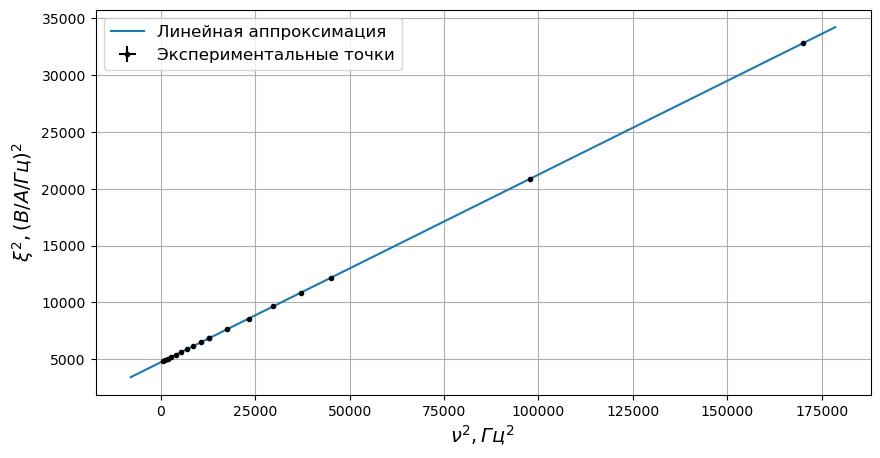

Coefficions calculeted in linear approximation:
k =  0.1650896416555324 +- 7.826354797327021e-05
b =  4735.524645407463 +- 3.88008197529038


In [292]:
plot1(data_shared["x"], data_shared["y"], "$\\nu^2, {Гц}^2$", "$\\xi^2, (В/А/Гц)^2$", legend='Линейная аппроксимация')

In [293]:
data4["phi"]=2*np.pi*data4["Nu,Hz"]*data4["Tau, ms"]/(10**3)*2.16/0.67
data4["tg"]=np.tan(data4["phi"]-np.pi/2)
data4

,"Nu,Hz","Tau, ms","I,A","U,V",ksi,y,x,phi,tg
0,112.5,0.95,0.39828,0.5424,0.012105,6824.057540,12656.25,2.164886,0.675494
1,132.5,0.85,0.38667,0.5864,0.011446,7633.518986,17556.25,2.281359,0.860507
2,152.5,0.75,0.37652,0.6201,0.010800,8574.174633,23256.25,2.316807,0.924173
3,172.5,0.65,0.36785,0.6460,0.010181,9648.386306,29756.25,2.271231,0.843031
4,192.5,0.60,0.36045,0.6660,0.009598,10854.331198,37056.25,2.339596,0.967341
5,212.5,0.56,0.35366,0.6816,0.009070,12157.116834,45156.25,2.410492,1.114951
6,312.5,0.42,0.33260,0.7199,0.006926,20844.917758,97656.25,2.658631,1.907012
7,412.5,0.33,0.32030,0.7291,0.005518,32838.823285,170156.25,2.757381,2.473380
8,512.5,0.28,0.31160,0.7268,0.004551,48278.392388,262656.25,2.906770,4.179975
9,612.5,0.24,0.30322,0.7183,0.003868,66852.267153,375156.25,2.977667,6.045593


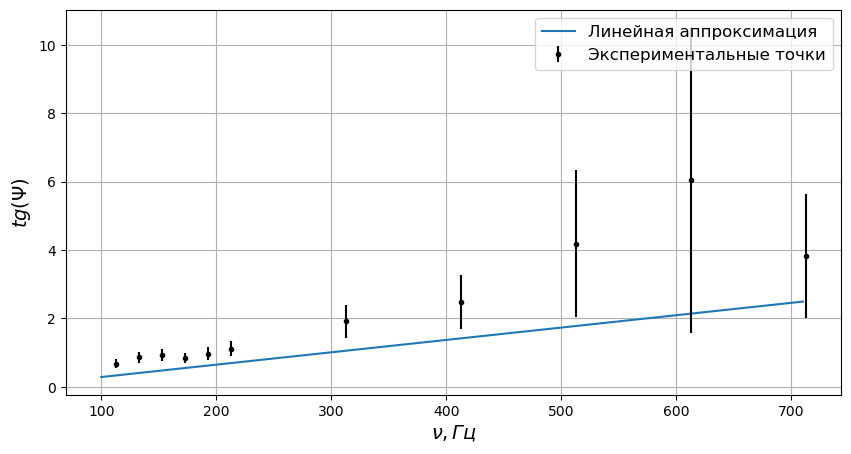

Coefficions calculeted in linear approximation:
k =  0.006117621029741748 +- 0.0004263704743311678
b =  -0.07925817679700224 +- 0.09922278549020701


In [294]:
x_exp=data4["Nu,Hz"].iloc[:11]
y_exp=data4["tg"].iloc[:11]
x_th, y_th = linear_theory(x_exp.iloc[:8], y_exp.iloc[:8])
plt.figure(figsize=(10, 5))
plt.plot([100, 710], np.array([100, 710])*0.0036171303114945976-0.07925817679700224, label='Линейная аппроксимация')
plt.errorbar(x_exp, y_exp, yerr=1/25*data4["phi"].iloc[:11]/np.cos(data4["phi"].iloc[:11]-np.pi/2)**2, fmt=".k", label="Экспериментальные точки")

plt.xlabel("$\\nu, Гц$", fontsize=14)
plt.ylabel("$tg (\\Psi)$", fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()
error_of_exp(np.array(x_exp.iloc[:8]), np.array(y_exp.iloc[:8]))

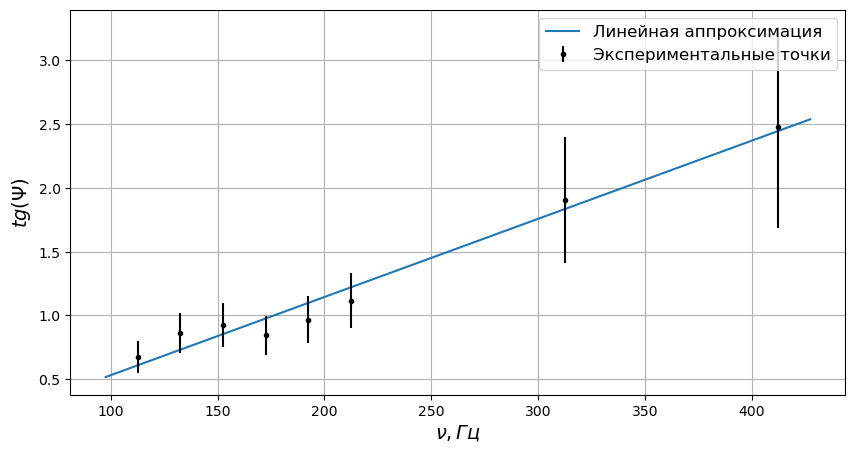

In [295]:
x_exp=data4["Nu,Hz"].iloc[:8]
y_exp=data4["tg"].iloc[:8]
x_th, y_th = linear_theory(x_exp.iloc[:8], y_exp.iloc[:8])
plt.figure(figsize=(10, 5))
plt.plot(x_th, y_th, label='Линейная аппроксимация')
plt.errorbar(x_exp, y_exp, yerr=1/25*data4["phi"].iloc[:8]/np.cos(data4["phi"].iloc[:8]-np.pi/2)**2, fmt=".k", label="Экспериментальные точки")

plt.xlabel("$\\nu, Гц$", fontsize=14)
plt.ylabel("$tg (\\Psi)$", fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

In [296]:
data45=pd.concat([data4, data5], ignore_index=True)
data45["phi"]=2*np.pi*data45["Nu,Hz"]*data45["Tau, ms"]/(10**3)*2.7-np.pi/2
data45["sqr"]=data45["Nu,Hz"]**0.5
data45

,"Nu,Hz","Tau, ms","I,A","U,V",ksi,y,x,phi,tg,sqr
0,112.5,0.9500,0.398280,0.5424,0.012105,6824.057540,12656.25,0.242295,0.675494,10.606602
1,132.5,0.8500,0.386670,0.5864,0.011446,7633.518986,17556.25,0.339842,0.860507,11.510864
2,152.5,0.7500,0.376520,0.6201,0.010800,8574.174633,23256.25,0.369530,0.924173,12.349089
3,172.5,0.6500,0.367850,0.6460,0.010181,9648.386306,29756.25,0.331359,0.843031,13.133926
4,192.5,0.6000,0.360450,0.6660,0.009598,10854.331198,37056.25,0.388615,0.967341,13.874437
5,212.5,0.5600,0.353660,0.6816,0.009070,12157.116834,45156.25,0.447991,1.114951,14.577380
6,312.5,0.4200,0.332600,0.7199,0.006926,20844.917758,97656.25,0.655807,1.907012,17.677670
7,412.5,0.3300,0.320300,0.7291,0.005518,32838.823285,170156.25,0.738510,2.473380,20.310096
8,512.5,0.2800,0.311600,0.7268,0.004551,48278.392388,262656.25,0.863624,4.179975,22.638463
9,612.5,0.2400,0.303220,0.7183,0.003868,66852.267153,375156.25,0.923000,6.045593,24.748737


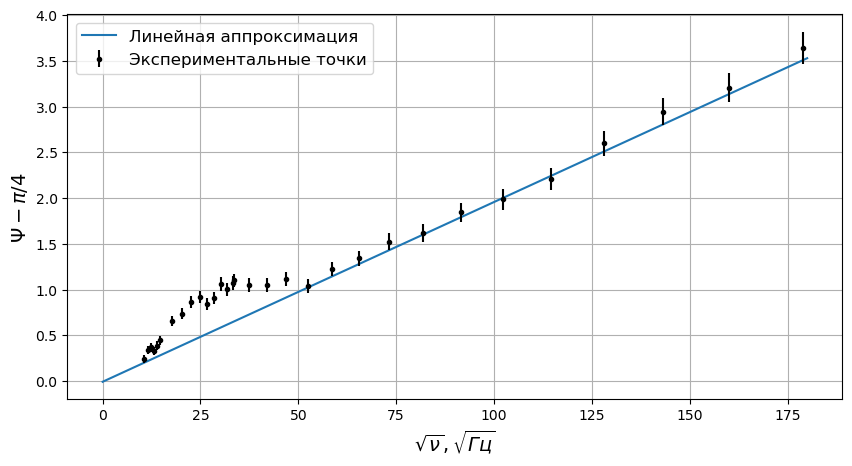

Coefficions calculeted in linear approximation:
k =  0.020196340084793547 +- 0.00038398200275641776
b =  -0.00561091282254045 +- 0.042786290575577444


In [297]:
x_exp=data45["sqr"]
y_exp=data45["phi"]
x_th, y_th = linear_theory(x_exp.iloc[:8], y_exp.iloc[:8])
plt.figure(figsize=(10, 5))
plt.plot([0, 180], np.array([0, 175])*0.0201963+-0.005610, label='Линейная аппроксимация')
plt.errorbar(x_exp, y_exp, yerr=1/25*(data45["phi"]+np.pi/4), fmt=".k", label="Экспериментальные точки")

plt.xlabel("$\\sqrt{\\nu}, \\sqrt{Гц}$", fontsize=14)
plt.ylabel("$\\Psi-\\pi/4$", fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()
error_of_exp(np.array(x_exp.iloc[19:]), np.array(y_exp.iloc[19:]))

In [298]:
error_of_exp(np.array(x_exp.iloc[19:]), np.array(y_exp.iloc[19:]))

Coefficions calculeted in linear approximation:
k =  0.020196340084793547 +- 0.00038398200275641776
b =  -0.00561091282254045 +- 0.042786290575577444


In [299]:
RLC=RLC.drop([7, 12])

In [303]:
RLC["y"]=(10.370-RLC["L,mH "])/(RLC["L,mH "]-2.945)
RLC["x"]=RLC["Nu,Hz"]**2

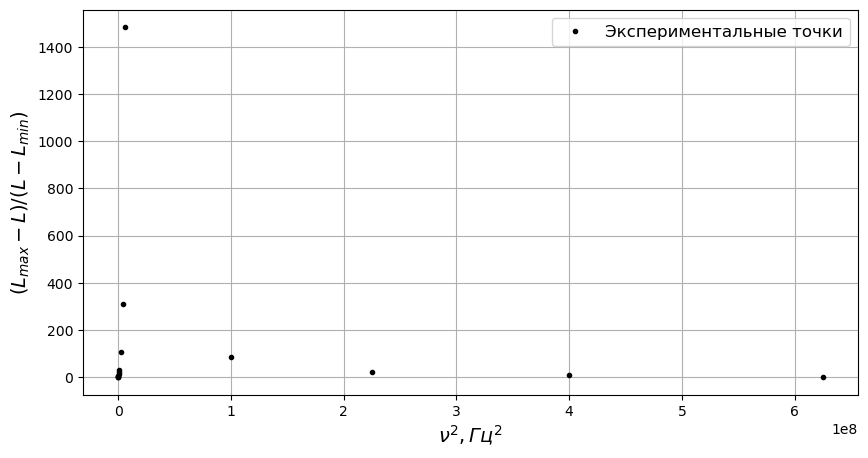

In [312]:
x_th, y_th = linear_theory(x_exp.iloc[:8], y_exp.iloc[:8])
plt.figure(figsize=(10, 5))
plt.errorbar(RLC["x"], RLC["y"], fmt=".k", label="Экспериментальные точки")

plt.xlabel("$\\nu^2, Гц^2$", fontsize=14)
plt.ylabel("$(L_{max}-L)/(L-L_{min})$", fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

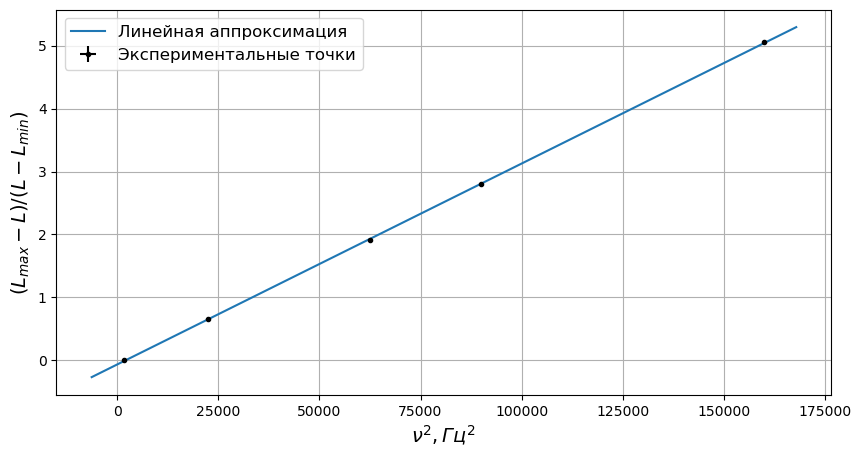

Coefficions calculeted in linear approximation:
k =  3.190902386278203e-05 +- 1.0702575739965491e-07
b =  -0.06439161737591771 +- 0.009344404107502181


In [313]:
plot1(RLC["x"].iloc[:5], RLC["y"].iloc[:5],"$\\nu^2, Гц^2$", "$(L_{max}-L)/(L-L_{min})$", legend="Линейная аппроксимация")

In [321]:
data5["ksi"]=data5["U,V"]/data5["I,A"]/data5["Nu,Hz"]
data_shared=pd.concat([data3, data4, data5], ignore_index=True)
data_shared["h1/h0"]=data_shared["ksi"]/0.014533

In [322]:
data_shared

,"U,V","I,A","Nu,Hz",ksi,y,x,"Tau, ms",phi,tg,h1/h0
0,0.1476,0.454300,22.5,0.014440,4795.984765,506.25,NaN,NaN,NaN,0.993587
1,0.2093,0.450870,32.5,0.014283,4901.521857,1056.25,NaN,NaN,NaN,0.982832
2,0.2672,0.445830,42.5,0.014102,5028.558771,1806.25,NaN,NaN,NaN,0.970338
3,0.3205,0.439850,52.5,0.013879,5191.247461,2756.25,NaN,NaN,NaN,0.955012
4,0.3690,0.433260,62.5,0.013627,5385.232934,3906.25,NaN,NaN,NaN,0.937654
5,0.4127,0.426350,72.5,0.013352,5609.699660,5256.25,NaN,NaN,NaN,0.918703
6,0.4516,0.419350,82.5,0.013053,5868.854265,6806.25,NaN,NaN,NaN,0.898190
7,0.4861,0.412470,92.5,0.012741,6160.514111,8556.25,NaN,NaN,NaN,0.876670
8,0.5165,0.405810,102.5,0.012417,6485.635969,10506.25,NaN,NaN,NaN,0.854414
9,0.5431,0.399430,112.5,0.012086,6845.840872,12656.25,NaN,NaN,NaN,0.831632


In [325]:
def theor_r_wrapper(f, sigma=1, a=1, h=1):
    return lambda x: f(x, sigma, a, h)

def theoretical_r(freq, sigma, a, h):
    mu_0 = 4*np.pi * 10**-7
    alpha = np.sqrt((.0 + 1.j) * 2 * np.pi * freq * sigma * mu_0)
    
    denominator = np.cosh(alpha * h) + 0.5 * alpha * a * np.sinh(alpha * h)
    
    return 1/np.abs(denominator)

theoretical_r = theor_r_wrapper(theoretical_r, sigma=4.432*10**7, a=22.5*10**-3, h=1.5*10**-3)

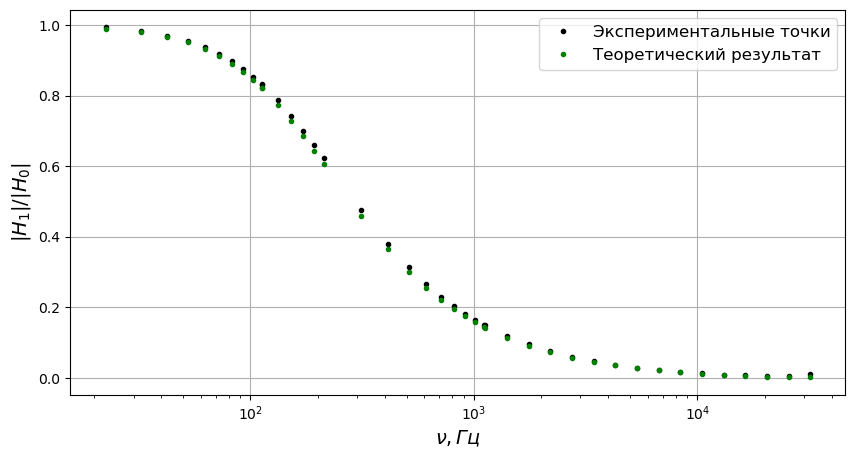

In [329]:
x_exp=data_shared["Nu,Hz"]
y_exp=data_shared["h1/h0"]
#x_th, y_th = linear_theory(x_exp.iloc[:8], y_exp.iloc[:8])
plt.figure(figsize=(10, 5))
#plt.plot(x_th, y_th, label='Линейная аппроксимация')
plt.errorbar(x_exp, y_exp, fmt=".k", label="Экспериментальные точки")
plt.errorbar(x_exp, theoretical_r(x_exp), fmt=".g", label="Теоретический результат")
plt.semilogx()
plt.xlabel("$\\nu, Гц$", fontsize=14)
plt.ylabel("$|H_1|/|H_0|$", fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()